# Group - 2 Deep Forecasting Project
by Ram Vyas, David Moscsizko , Aaron Ha

# Facebook Prophet

Facebook's Prophet uses three main components to make predictions: Trend, Seasonality, and Holidays. It's general formula takes the following form:

$$y(t) = g(t) + s(t) + h(t) + e(t)$$

$g(t)$ represents the trend, $s(t)$ represents the seasonality, $h(t)$ represents the holidays, and $e(t)$ represents any other noise not covered in the other three functions. 

$g(t)$ is most commonly the logistic function, which takes the general shape:
$$g(t) = \frac{C}{1 + -k^{t-m}} $$
C is the **Carrying Capacity**

K is the **Growth Rate**

m is the **offset**

Changepoints are used to indicate when the growth rate can change. For the most part, these are placed around important dates like holidays. 

Prophet uses a standard Fourier Series for the seasonality. $s(t)$ allows the model to change based on different time periods. For example, a model might produce effects that happen every 5 days (standard work week).

$h(t)$ represents specific holidays that need to be accounted for, such as Black Friday, a massive shopping holiday. $h(t)$ uses a matrix of regressors, along with a prior for each regressor. 

Reference:
Taylor​​, S. J., &amp; Letham​, B. (2017, September 27). Forecasting at scale. PeerJ Preprints. Retrieved December 10, 2021, from https://doi.org/10.7287/peerj.preprints.3190v2.

In [ ]:
 !pip install yfinance
 !pip install yahoofinancials
 !pip install fbprophet
 !pip install pystan
 !pip install fbprophet
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from yahoofinancials import YahooFinancials
from fbprophet import Prophet
from sklearn.model_selection import train_test_split


     |████████████████████████████████| 6.3 MB 21.6 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15190 sha256=4741bdf6f41f34107127729d1b60b58659aca7a2aabb8660120bc5164da7a285
  Stored in directory: /root/.cache/pip/wheels/4b/63/46/e7110bfee88685fe69e338d1b14d1748921862aa57b6705b60
Successfully built yahoofinancials


In [ ]:
collection_start_date = "2021-09-10"
collection_end_date = "2021-10-31"

yahoo_financials = YahooFinancials('BTC-USD')
data=yahoo_financials.get_historical_price_data(collection_start_date, collection_end_date, "daily")
btc_df = pd.DataFrame(data['BTC-USD']['prices'])
# btc_df = btc_df.drop('date', axis=1).set_index('formatted_date')

btc_df.drop(['date','low','open','close','volume','adjclose'], axis=1, inplace=True)
#X = btc_df['formatted_date']
#Y = btc_df['high']
btc_df.columns = ['y', 'ds']
#btc_df['y'] = np.log(btc_df['y'])
btc_df.head()

,y,ds
0,47031.742188,2021-09-10
1,45969.292969,2021-09-11
2,46364.878906,2021-09-12
3,46598.679688,2021-09-13
4,47218.125000,2021-09-14


In [ ]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(btc_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-09-10,2791.242726,45128.716751,51094.760084,2791.242726,2791.242726,45387.107163,45387.107163,45387.107163,44661.471282,44661.471282,44661.471282,725.635880,725.635880,725.635880,0.0,0.0,0.0,48178.349888
1,2021-09-11,2644.119037,44106.947216,49877.780734,2644.119037,2644.119037,44337.085505,44337.085505,44337.085505,44661.471282,44661.471282,44661.471282,-324.385778,-324.385778,-324.385778,0.0,0.0,0.0,46981.204542
2,2021-09-12,2496.995349,43947.057320,49911.681012,2496.995349,2496.995349,44307.372124,44307.372124,44307.372124,44661.471282,44661.471282,44661.471282,-354.099158,-354.099158,-354.099158,0.0,0.0,0.0,46804.367473
3,2021-09-13,2349.871661,44015.046285,49838.413297,2349.871661,2349.871661,44697.406862,44697.406862,44697.406862,44661.471282,44661.471282,44661.471282,35.935579,35.935579,35.935579,0.0,0.0,0.0,47047.278522
4,2021-09-14,2202.747972,43649.892817,49294.962187,2202.747972,2202.747972,44289.474381,44289.474381,44289.474381,44661.471282,44661.471282,44661.471282,-371.996902,-371.996902,-371.996902,0.0,0.0,0.0,46492.222353


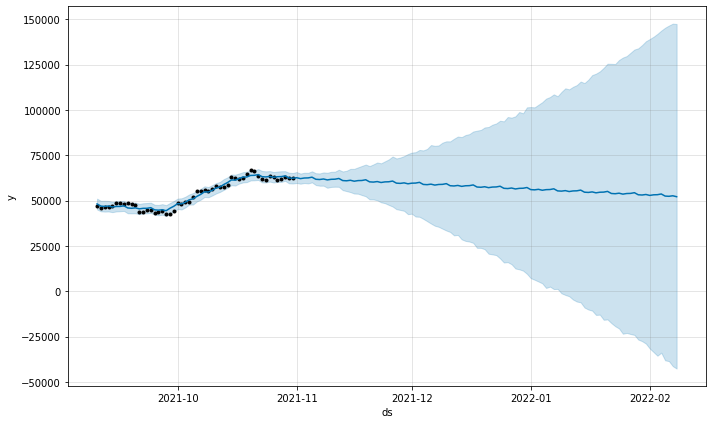

In [ ]:
plot1 = m.plot(forecast)

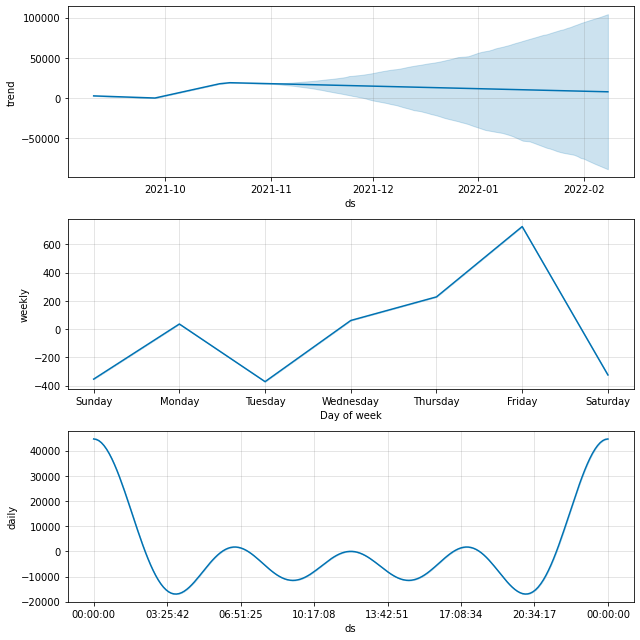

In [ ]:
plt2 = m.plot_components(forecast)

In [ ]:

from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m,period=2,horizon=51)


INFO:fbprophet:Making 44 forecasts with cutoffs between 2021-09-17 23:59:59.999999949 and 2021-10-30 23:59:59.999999949


  0%|          | 0/44 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.
INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.
INFO:fbprophet:n_changepoints greater than number of observations. Using 13.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:

In [ ]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-09-18,37975.518695,34973.646969,40821.515858,48791.781250,2021-09-17 23:59:59.999999949
1,2021-09-19,50504.436390,50121.122123,51001.621012,48328.367188,2021-09-18 23:59:59.999999949
2,2021-09-20,47796.131656,47046.234992,48655.182661,47328.199219,2021-09-19 23:59:59.999999949
3,2021-09-21,48849.849942,48149.425128,49498.704576,43607.609375,2021-09-20 23:59:59.999999949
4,2021-09-22,45793.650014,44637.286213,46999.740155,43978.621094,2021-09-21 23:59:59.999999949


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,0 days 00:00:00.000000051,1.265278e+07,3557.074665,2720.126879,0.050987,0.040813,0.5


# DeepAR

DeepAR functions by analyzing different-scale time series, specifically their relationships to categorical features. Grouping relationships with a specific categorical feature into an embedding vector allows predictions to be made on changes that may arise from modification of the concerned feature.

DeepAR supports the following basic time series:

Frequency of the Time Series | Derived Features
-----------------------------|------------------
`Minute` | `minute-of-hour`, `hour-of-day`, `day-of-week`, `day-of-month`, `day-of-year`
`Hour` | `hour-of-day`, `day-of-week`, `day-of-month`, `day-of-year`
`Day` | `day-of-week`, `day-of-month`, `day-of-year`
`Week` | `day-of-month`, `week-of-year`
`Month` | `month-of-year`

The model is trained by stochastically sampling examples from each time series in the training dataset. The size of these examples is governed by the combined value of the hyperparameters of `context_length`, which is the amount of data each sample location has to make predictions with, and `prediction_length`, the period for which the model must make a prediction at the given location. The model can then use its findings to make requested predictions.

In [ ]:
# !pip install yfinance
# !pip install yahoofinancials
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, GRU, LSTM, Dropout
from keras.metrics import MeanSquaredError

In [ ]:
collection_start_date = "2017-01-01"
collection_end_date = "2021-11-29"

btc_df = yf.download(tickers='BTC-USD', start = collection_start_date, end = collection_end_date, interval="1d")
print(btc_df)

[*********************100%***********************]  1 of 1 completed
                    Open          High  ...     Adj Close       Volume
Date                                    ...                           
2017-01-01    963.658020   1003.080017  ...    998.325012    147775008
2017-01-02    998.617004   1031.390015  ...   1021.750000    222184992
2017-01-03   1021.599976   1044.079956  ...   1043.839966    185168000
2017-01-04   1044.400024   1159.420044  ...   1154.729980    344945984
2017-01-05   1156.729980   1191.099976  ...   1013.380005    510199008
...                  ...           ...  ...           ...          ...
2021-11-25  57165.417969  59367.968750  ...  57274.679688  34284016248
2021-11-26  58960.285156  59183.480469  ...  53569.765625  41810748221
2021-11-27  53736.429688  55329.257812  ...  54815.078125  30560857714
2021-11-28  54813.023438  57393.843750  ...  57248.457031  28116886357
2021-11-29  57291.906250  58872.878906  ...  57806.566406  32370840356

[1790 r

            Adj Close      Open      High       Low     Close       Volume
Date                                                                      
2017-01-01     998.33    963.66   1003.08    958.70    998.33    147775008
2017-01-02    1021.75    998.62   1031.39    996.70   1021.75    222184992
2017-01-03    1043.84   1021.60   1044.08   1021.60   1043.84    185168000
2017-01-04    1154.73   1044.40   1159.42   1044.40   1154.73    344945984
2017-01-05    1013.38   1156.73   1191.10    910.42   1013.38    510199008
...               ...       ...       ...       ...       ...          ...
2021-11-25   57274.68  57165.42  59367.97  57146.68  57274.68  34284016248
2021-11-26   53569.77  58960.29  59183.48  53569.77  53569.77  41810748221
2021-11-27   54815.08  53736.43  55329.26  53668.36  54815.08  30560857714
2021-11-28   57248.46  54813.02  57393.84  53576.73  57248.46  28116886357
2021-11-29   57806.57  57291.91  58872.88  56792.53  57806.57  32370840356

[1790 rows x 6 columns]


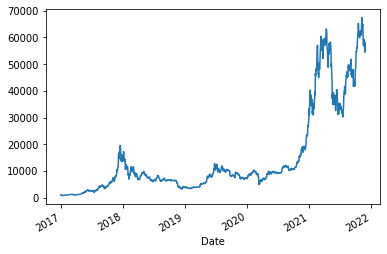

In [ ]:
data = btc_df[['Adj Close','Open', 'High', 'Low', 'Close', 'Volume']].round(2)
print(data)
data['Mid'] = (data['High'] + data['Low']) / 2
data['Mid'].plot()

In [ ]:
#normalize and reshape train and test
def train_test(data,ts,p):
    train = data[:'2021'].iloc[:,0:1].values
    test  = data['2021':].iloc[:,0:1].values
    train_len = len(train)
    test_len = len(test)
    sc = MinMaxScaler(feature_range=(0,1))
    train_scaled=sc.fit_transform(train)
    X_train = []
    y_train = []
    y_train_stacked = []
    for i in range(ts,train_len-1): 
        X_train.append(train_scaled[i-ts:i,0])
        y_train.append(train_scaled[i:i+p,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    print(X_train)
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    inputs = pd.concat((data["Mid"][:'2020'], data["Mid"]['2021':]),axis=0).values
    inputs = inputs[len(inputs)-len(test) - ts:]
    inputs = inputs.reshape(-1,1)
    inputs  = sc.transform(inputs)
    X_test = []
    for i in range(ts,test_len+ts-p):
        X_test.append(inputs[i-ts:i,0])   
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    return X_train, y_train , X_test, sc
    
X_train, y_train, X_test, sc = train_test(data,5,2)
print('AFTER RESHAPING...')
print(X_train)

[[0.00330249 0.00365314 0.00398389 0.00564419 0.00352782]
 [0.00365314 0.00398389 0.00564419 0.00352782 0.00186318]
 [0.00398389 0.00564419 0.00352782 0.00186318 0.00195885]
 ...
 [0.86769766 0.83114692 0.85030844 0.83101427 0.84590068]
 [0.83114692 0.85030844 0.83101427 0.84590068 0.79042888]
 [0.85030844 0.83101427 0.84590068 0.79042888 0.8090743 ]]
AFTER RESHAPING...
[[[0.00330249]
  [0.00365314]
  [0.00398389]
  [0.00564419]
  [0.00352782]]

 [[0.00365314]
  [0.00398389]
  [0.00564419]
  [0.00352782]
  [0.00186318]]

 [[0.00398389]
  [0.00564419]
  [0.00352782]
  [0.00186318]
  [0.00195885]]

 ...

 [[0.86769766]
  [0.83114692]
  [0.85030844]
  [0.83101427]
  [0.84590068]]

 [[0.83114692]
  [0.85030844]
  [0.83101427]
  [0.84590068]
  [0.79042888]]

 [[0.85030844]
  [0.83101427]
  [0.84590068]
  [0.79042888]
  [0.8090743 ]]]


In [ ]:
def model_training(X_train, y_train, X_test, sc):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    model.add(LSTM(units=50, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(units=2))
    model.compile(optimizer='adam',loss='mean_squared_error')
    model.fit(X_train,y_train,epochs=50,batch_size=150)
    prediction = model.predict(X_test)
    prediction = sc.inverse_transform(prediction)
    return model, prediction

model, prediction = model_training(X_train, y_train, X_test, sc)

Epoch 1/50
12/12 [==============================] - 4s 16ms/step - loss: 0.0705
Epoch 2/50
12/12 [==============================] - 0s 15ms/step - loss: 0.0246
Epoch 3/50
12/12 [==============================] - 0s 14ms/step - loss: 0.0091
Epoch 4/50
12/12 [==============================] - 0s 17ms/step - loss: 0.0030
Epoch 5/50
12/12 [==============================] - 0s 15ms/step - loss: 0.0027
Epoch 6/50
12/12 [==============================] - 0s 14ms/step - loss: 0.0022
Epoch 7/50
12/12 [==============================] - 0s 15ms/step - loss: 0.0020
Epoch 8/50
12/12 [==============================] - 0s 15ms/step - loss: 0.0021
Epoch 9/50
12/12 [==============================] - 0s 14ms/step - loss: 0.0021
Epoch 10/50
12/12 [==============================] - 0s 15ms/step - loss: 0.0019
Epoch 11/50
12/12 [==============================] - 0s 15ms/step - loss: 0.0019
Epoch 12/50
12/12 [==============================] - 0s 15ms/step - loss: 0.0017
Epoch 13/50
12/12 [==================

Date
2017-01-01      980.890
2017-01-02     1014.045
2017-01-03     1032.840
2017-01-04     1101.910
2017-01-05     1050.760
                ...    
2021-11-25    58257.325
2021-11-26    56376.625
2021-11-27    54498.810
2021-11-28    55485.285
2021-11-29    57832.705
Name: Mid, Length: 1790, dtype: float64


(8421465.0, <matplotlib.axes._subplots.AxesSubplot at 0x7f07b70a1690>)

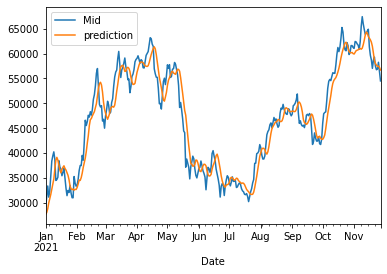

In [ ]:
def y_yhat_plot(preds):
    y_yhat = pd.DataFrame(columns = ['Mid', 'prediction'])
    y_yhat['Mid'] = data.loc['2021':,'Mid'][0:len(preds)]
    y_yhat['prediction'] = preds[:,0]
    m = MeanSquaredError()
    m.update_state(np.array(y_yhat['Mid']),np.array(y_yhat['prediction'])) 
    return (m.result().numpy(), y_yhat.plot() )

print(data['Mid'])
y_yhat_plot(prediction)  

# Example Forcasting Method

Our group also developed a prediction model that is more simple, but does not predict further than one time step. It uses an averaging technique. It represents future stock prices as an average of the previous stock prices. We used the previous two days to represent the future price, because any larger of a window size gave results that we found to be unacceptable. 

In [ ]:
!pip install yfinance
!pip install yfinancials
!pip install yahoofinancials
!pip install pytorch-forecasting
# !pip install --upgrade mxnet==1.6.0
# !pip install gluonts
# !pip install deepar
# !pip install deepar.dataset.time_series
# !pip install pytorch-forecasting


ERROR: Could not find a version that satisfies the requirement yfinancials (from versions: none)
ERROR: No matching distribution found for yfinancials
     |████████████████████████████████| 113 kB 26.0 MB/s 
     |████████████████████████████████| 525 kB 32.2 MB/s 
     |████████████████████████████████| 308 kB 41.8 MB/s 
     |████████████████████████████████| 11.3 MB 29.4 MB/s 
     |████████████████████████████████| 209 kB 64.7 MB/s 
     |████████████████████████████████| 80 kB 7.6 MB/s 
     |████████████████████████████████| 132 kB 61.2 MB/s 
     |████████████████████████████████| 829 kB 45.9 MB/s 
     |████████████████████████████████| 332 kB 64.9 MB/s 
     |████████████████████████████████| 596 kB 35.6 MB/s 
     |████████████████████████████████| 1.1 MB 33.7 MB/s 
     |████████████████████████████████| 192 kB 68.0 MB/s 
     |████████████████████████████████| 271 kB 63.6 MB/s 
     |████████████████████████████████| 160 kB 64.3 MB/s 
     |████████████████████████████████

In [ ]:
# Make sure that you have all these libaries available to run the code successfully
from yahoofinancials import YahooFinancials
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

In [ ]:
collection_start_date = "2021-09-10"
collection_end_date = "2021-10-31"

yahoo_financials = YahooFinancials('BTC-USD')
data=yahoo_financials.get_historical_price_data(collection_start_date, collection_end_date, "daily")
btc_df = pd.DataFrame(data['BTC-USD']['prices'])
# btc_df = btc_df.drop('date', axis=1).set_index('formatted_date')

btc_df.drop(['date','open','close','volume','adjclose'], axis=1, inplace=True)
#X = btc_df['formatted_date']
#Y = btc_df['high']
btc_df.columns = ['high','low','date']

btc_df['date'] = pd.to_datetime(btc_df['date'], format="%Y-%m-%d")

#btc_df['y'] = np.log(btc_df['y'])
print(btc_df.head())

           high           low       date
0  47031.742188  44344.484375 2021-09-10
1  45969.292969  44818.265625 2021-09-11
2  46364.878906  44790.460938 2021-09-12
3  46598.679688  43591.320312 2021-09-13
4  47218.125000  44752.332031 2021-09-14


In [ ]:
data = btc_df
# add time index
count = 0
#data.insert(0, 'time_idx', range(0, len(data)))
# print(data)

In [ ]:
# # Sort DataFrame by date
df = data
# df = df.sort_values('date')

# # Double check the result
# print(df.head())

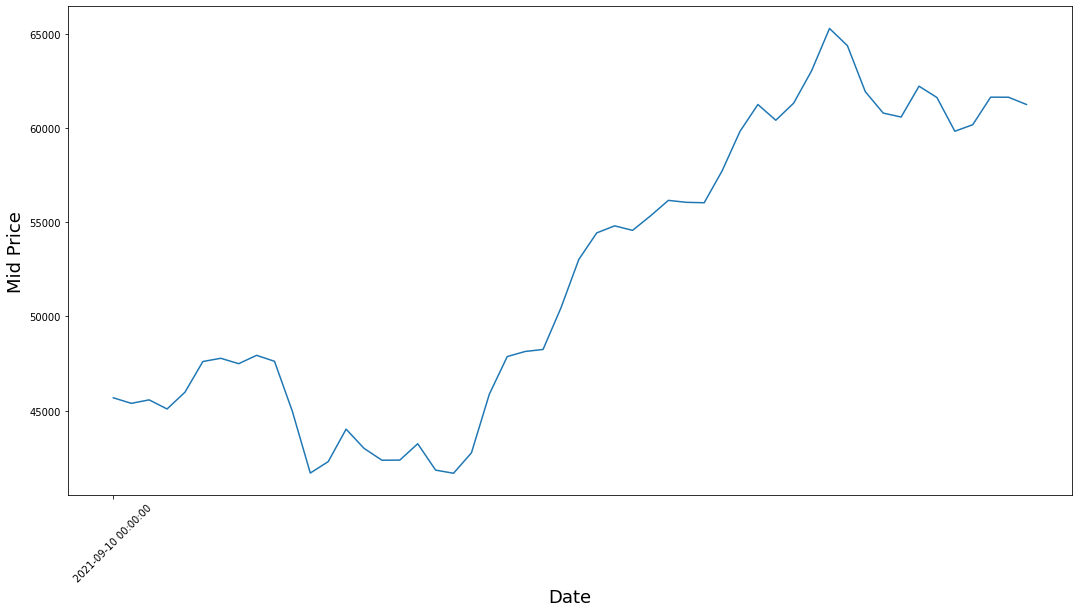

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),((df['high']+df['low'])/2.0))
plt.xticks(range(0,df.shape[0],500),df['date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [ ]:
# First calculate the mid prices from the highest and lowest
high_prices = df.loc[:,'high'].to_numpy()
low_prices = df.loc[:,'low'].to_numpy()
mid_prices = (high_prices+low_prices)/2.0

print(mid_prices)

[45688.11328125 45393.77929688 45577.66992188 45095.
 45985.22851562 47611.8984375  47783.19335938 47496.72265625
 47939.53320312 47624.0859375  44963.55664062 41697.609375
 42302.12695312 44025.7578125  43008.52539062 42378.08984375
 42383.88085938 43251.93945312 41853.40429688 41687.46289062
 42768.59179688 45878.01757812 47873.77929688 48143.99023438
 48250.890625   50456.41210938 53028.328125   54432.046875
 54805.51757812 54566.54492188 55332.78125    56156.40234375
 56052.92578125 56029.81640625 57717.90429688 59812.63671875
 61240.29882812 60404.99609375 61313.70898438 63028.734375
 65270.53320312 64358.97851562 61918.91015625 60785.20117188
 60574.57421875 62210.5625     61610.09375    59821.68554688
 60167.77539062 61628.78710938 61624.265625   61240.25      ]


In [ ]:
train_data = []
counter = 0
for i in mid_prices:
  if counter==30:
    break
  train_data.append(i)
  counter += 1
test_data = mid_prices[30:]
train_data = np.array(train_data)
print(len(train_data))
print(len(test_data))

30
22


In [ ]:
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)
print(train_data)
print(test_data)

[[45688.11328125]
 [45393.77929688]
 [45577.66992188]
 [45095.        ]
 [45985.22851562]
 [47611.8984375 ]
 [47783.19335938]
 [47496.72265625]
 [47939.53320312]
 [47624.0859375 ]
 [44963.55664062]
 [41697.609375  ]
 [42302.12695312]
 [44025.7578125 ]
 [43008.52539062]
 [42378.08984375]
 [42383.88085938]
 [43251.93945312]
 [41853.40429688]
 [41687.46289062]
 [42768.59179688]
 [45878.01757812]
 [47873.77929688]
 [48143.99023438]
 [48250.890625  ]
 [50456.41210938]
 [53028.328125  ]
 [54432.046875  ]
 [54805.51757812]
 [54566.54492188]]
[[55332.78125   ]
 [56156.40234375]
 [56052.92578125]
 [56029.81640625]
 [57717.90429688]
 [59812.63671875]
 [61240.29882812]
 [60404.99609375]
 [61313.70898438]
 [63028.734375  ]
 [65270.53320312]
 [64358.97851562]
 [61918.91015625]
 [60785.20117188]
 [60574.57421875]
 [62210.5625    ]
 [61610.09375   ]
 [59821.68554688]
 [60167.77539062]
 [61628.78710938]
 [61624.265625  ]
 [61240.25      ]]


In [ ]:
# Now perform exponential moving average smoothing
# So the data will have a smoother curve than the original ragged data
# EMA = 0.0
# gamma = 0.1
# for ti in range(30):
#   EMA = gamma*train_data[ti] + (1-gamma)*EMA
#   train_data[ti] = EMA

# Used for visualization and test purposes
print(train_data)
print(test_data)
all_mid_data = np.concatenate((train_data,test_data),axis=0)

[[45688.11328125]
 [45393.77929688]
 [45577.66992188]
 [45095.        ]
 [45985.22851562]
 [47611.8984375 ]
 [47783.19335938]
 [47496.72265625]
 [47939.53320312]
 [47624.0859375 ]
 [44963.55664062]
 [41697.609375  ]
 [42302.12695312]
 [44025.7578125 ]
 [43008.52539062]
 [42378.08984375]
 [42383.88085938]
 [43251.93945312]
 [41853.40429688]
 [41687.46289062]
 [42768.59179688]
 [45878.01757812]
 [47873.77929688]
 [48143.99023438]
 [48250.890625  ]
 [50456.41210938]
 [53028.328125  ]
 [54432.046875  ]
 [54805.51757812]
 [54566.54492188]]
[[55332.78125   ]
 [56156.40234375]
 [56052.92578125]
 [56029.81640625]
 [57717.90429688]
 [59812.63671875]
 [61240.29882812]
 [60404.99609375]
 [61313.70898438]
 [63028.734375  ]
 [65270.53320312]
 [64358.97851562]
 [61918.91015625]
 [60785.20117188]
 [60574.57421875]
 [62210.5625    ]
 [61610.09375   ]
 [59821.68554688]
 [60167.77539062]
 [61628.78710938]
 [61624.265625  ]
 [61240.25      ]]


In [ ]:
window_size = 2
N = all_mid_data.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N):

    if pred_idx >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = df.loc[pred_idx,'date']

    std_avg_predictions.append(np.mean(all_mid_data[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-all_mid_data[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for standard averaging: 1587409.06937


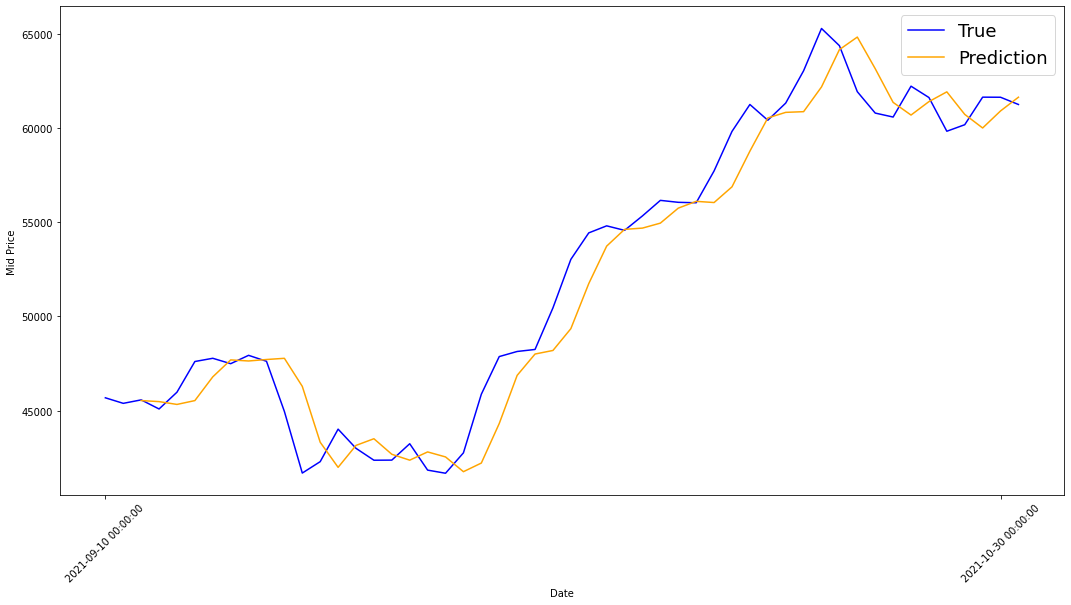

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(window_size,N),std_avg_predictions,color='orange',label='Prediction')
plt.xticks(range(0,df.shape[0],50),df['date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

# Twitter Sentiment Analysis


Our sentiment analysis scrapes tweets related to Bitcoin. Twitter's API provides each tweet with polarity and subjectivity values. The polarity of a tweet determines if the tweet has a positive or negative connotation behind it (via a positive or negative numeric value). We ignore polarities of 0 (since the idea is that a Bitcoin related tweet that is deemed "neutral" has no effect on the price). Subjectivity is a numeric value that describes how factual a tweet might be. The higher the subjectivity value, the less likely the tweet is to be factual. While we could not integrate our sentiment analysis on Bitcoin tweets with either of the Prophet or DeepAR models, we understand how it could be done. A feature of the model could exist that tweaks the predicted price based on average polarity and subectivity scores of Bitcoin tweets on a particular day. If on a given day, there are many positive tweets (highly positive polarities), we could predict that the price of Bitcoin on that day would increase. The subjectivities of those tweets would be the greatest determining factor of how much the price would increase.

We also collected tweets from the days leading up to the deadline and displayed Positive vs. Negative Bitcoin tweets.

In [ ]:
# import tweepy library for twitter api access and textblob libary for sentiment analysis
import csv
import tweepy
import numpy as np
from textblob import TextBlob
import re

In [ ]:
def get_subjectivity(tweets):
    # run subjectivity analysis on tweets

    tweet_subjectivity = []

    for tweet in tweets:
        analysis = TextBlob(tweet.text)
        tweet_subjectivity.append(analysis.sentiment.subjectivity)

    return tweet_subjectivity
    

def get_polarity(tweets):
    # run polarity analysis on tweets

    tweet_polarity = []

    for tweet in tweets:
        analysis = TextBlob(tweet.text)
        tweet_polarity.append(analysis.sentiment.polarity)

    return tweet_polarity

def classify_sentiment(analysis, threshold = 0):
    # classify sentiment polarity as positive or negative

    if analysis.sentiment.polarity > threshold:
        return 'Positive'
    elif analysis.sentiment.polarity < threshold:
        return 'Negative'
    else:
        return 'Neutral'


def get_sentiment_stats(tweets, get_polarity, get_subjectivity):
    # generate sentiment stats

    polarity = get_polarity(tweets)
    subjectivity = get_subjectivity(tweets)

    print('Polarity count: %s' % np.count_nonzero(polarity))
    print('Polarity average: %.3f' % np.mean(polarity))
    print('Polarity standard deviation: %.3f' % np.std(polarity))
    print('Polarity coefficient of variation: %.3f' % (np.std(polarity) / np.mean(polarity)))
    print('********')
    print('Subjectivity count: %s' % np.count_nonzero(subjectivity))
    print('Subjectivity average: %.3f' % np.mean(subjectivity))
    print('Subjectivity standard deviation: %.3f' % np.std(subjectivity))
    print('Subjectivity coefficient of variation: %.3f' % (np.std(subjectivity) / np.mean(subjectivity)))


# set twitter api credentials
consumer_key= 'SD6A9aQIFNBZDwAhKMPYvKyPk'
consumer_secret= 'KIAAune9TMMJyaDBwWohXOWcUMYDPuUDglWTmXMxXgMlbNO8Qa'
access_token='843250890203189248-7Yk1UQcrot4lqzKtxlZOj7BUrsxWS8a'
access_token_secret='PU3VXX0K0qeVVRhYoVycyG5wnkQfzlm0NKViXFkls1yMD'


# access twitter api via tweepy methods
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
twitter_api = tweepy.API(auth)

# fetch tweets by keywords
tweets = twitter_api.search(q=['bitcoin'], count=100)

# generate sentiment stats
get_sentiment_stats(tweets, get_polarity, get_subjectivity)

Polarity count: 49
Polarity average: 0.133
Polarity standard deviation: 0.223
Polarity coefficient of variation: 1.679
********
Subjectivity count: 59
Subjectivity average: 0.361
Subjectivity standard deviation: 0.332
Subjectivity coefficient of variation: 0.921


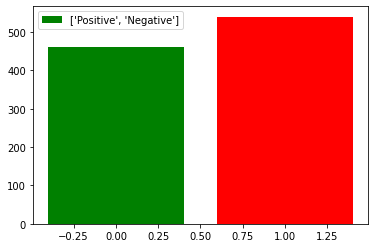

In [ ]:
# Declare parameters
crypto_currency = 'Bitcoin'
start = "2021-12-09"
end = "2021-12-12"
collected_count = 1000

# Collect tweets
search = f'#{crypto_currency} -filter:retweets'
tweet_cursor = tweepy.Cursor(twitter_api.search, q=search, lang='en', tweet_mode='extended').items(collected_count)
tweets = [tweet.full_text for tweet in tweet_cursor]

# Form into Pandas dataframe and trim data
tweets_df = pd.DataFrame(tweets, columns=['Tweets'])
for _, row in tweets_df.iterrows():
  row['Tweets'] = re.sub('http\$+', '', row['Tweets'])
  row['Tweets'] = re.sub('#\$+', '', row['Tweets'])
  row['Tweets'] = re.sub('@\S+', '', row['Tweets'])
  row['Tweets'] = re.sub('\\n', '', row['Tweets'])

# Analyze sentiment
tweets_df['Polarity'] = tweets_df['Tweets'].map(lambda tweet: TextBlob(tweet).sentiment.polarity)
tweets_df['Result'] = tweets_df['Polarity'].map(lambda pol: '+' if pol > 0 else '-')

# Sort into categories
positive = tweets_df[tweets_df.Result == '+'].count()['Tweets']
negative  = tweets_df[tweets_df.Result == '-'].count()['Tweets']

# Plot
plt.bar([0, 1], [positive, negative], label=['Positive', 'Negative'], color=['green', 'red'])
plt.legend()
plt.show()